# Introduction

#### Présentation de l'ensemble de données Titanic

L'ensemble de données Titanic est un ensemble de données célèbre dans le domaine de l'apprentissage automatique et de l'analyse de données. Il contient des données sur les passagers du Titanic et leur statut de survie. Il se compose d'un ensemble de données d'apprentissage de 891 observations et d'un ensemble de données de test de 418 observations. L'objectif est de prédire la survie des passagers dans l'ensemble de données de test sur la base des variables de l'ensemble de données de formation.

# Importation de bibliothèques
Pour commencer, importons les bibliothèques nécessaires que nous utiliserons tout au long de ce cahier :

In [1]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import  classification_report, confusion_matrix

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

ModuleNotFoundError: No module named 'xgboost'

# Chargement du jeu de données

Dans cette section, nous allons charger l'ensemble de données Titanic dans le bloc-notes. L'ensemble de données est stocké dans deux fichiers CSV, l'un pour les données d'entraînement et l'autre pour les données de test. Nous utiliserons la bibliothèque pandas pour charger les fichiers CSV dans des cadres de données que nous pourrons manipuler et explorer. Une fois les fichiers chargés, nous pouvons commencer à explorer les données et à les préparer pour la modélisation de l'apprentissage automatique.

In [3]:
# reading the train data
train_df = pd.read_csv("C:/Users/HP/Downloads/train.csv")

# reading the test data
test = pd.read_csv("C:/Users/HP/Downloads/test.csv")

# Compréhension des variables

Avant de commencer à analyser l'ensemble de données du Titanic, il est important de comprendre ce que chaque variable représente. L'ensemble de données contient les variables suivantes :

PassengerId : Un identifiant unique pour chaque passager.

Survivant : Le passager a survécu ou non (0 = Non, 1 = Oui).

Pclass : La classe du passager (1 = 1ère classe, 2 = 2ème classe, 3 = 3ème classe).

Nom : Le nom du passager.

Sexe : Le sexe du passager : Le sexe du passager.

Âge : l'âge du passager en années. Les valeurs fractionnaires sont incluses pour les enfants en bas âge.

SibSp : Nombre de frères et sœurs/conjoints à bord du Titanic.

Parch : Nombre de parents/enfants à bord du Titanic.

Ticket : Numéro du billet du passager.

Tarif : Le prix payé par le passager.

Cabine : Numéro de la cabine du passager (si disponible).

Embarqué : Le port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton).

# Exploration et préparation des données

In [4]:
# we use method head() to show the first 5 rows
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print (test.shape)
print (train_df.shape)

(418, 11)
(891, 12)


as we see above we have 11 attributes and 418 records in the test data set, but we have
12 attributes and 891 records in the train data set.


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The above df.describe() command presents statistical properties in vertical form.


In [8]:
# find if we have a duplicated rows in train data

train_df.duplicated().sum()

0

In [9]:
# # find if we have a null values in train data

train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# find if we have a duplicated rows in test data

test.duplicated().sum()

0

In [11]:
# find if we have a null value in test data
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
# The number of men who survived
train_df[train_df['Sex']=='male']['Survived'].sum()

109

In [13]:
# The number of women who survived
train_df[train_df['Sex']=='female']['Survived'].sum()

233

Le code ci-dessous utilise la bibliothèque Seaborn pour tracer des graphiques indiquant le nombre de passagers ayant survécu ou non à la catastrophe pour chacune des colonnes "Sex", "Embarked", "Pclass", "SibSp" et "Parch".

Une boucle est utilisée pour répéter le processus pour chaque colonne spécifiée dans la liste ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch'].

La fonction 'countplot' de Seaborn est utilisée pour dessiner le graphique. Cette fonction affiche le nombre de cas dans chaque catégorie pour les différentes valeurs de la colonne spécifiée (comme le sexe ou la classe de billet), ainsi que la couleur distinctive pour chaque catégorie (survivant et non survivant). En d'autres termes, le nombre de passagers qui ont survécu et qui n'ont pas survécu est affiché pour chaque valeur différente de la colonne spécifiée.

Sex


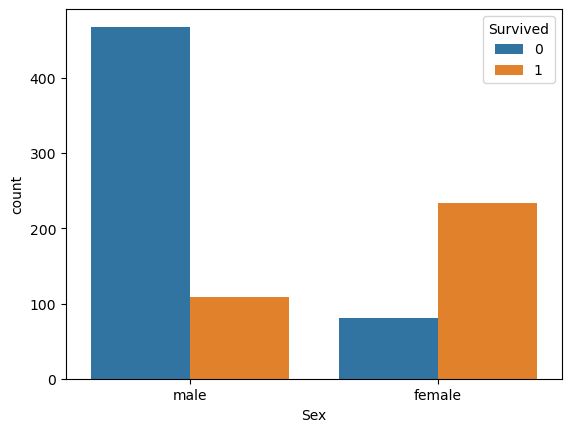


Embarked


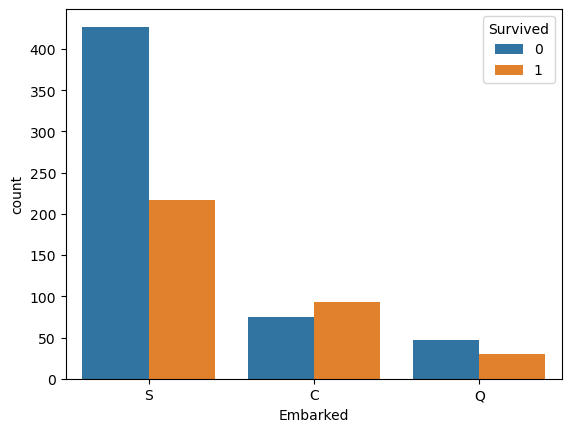


Pclass


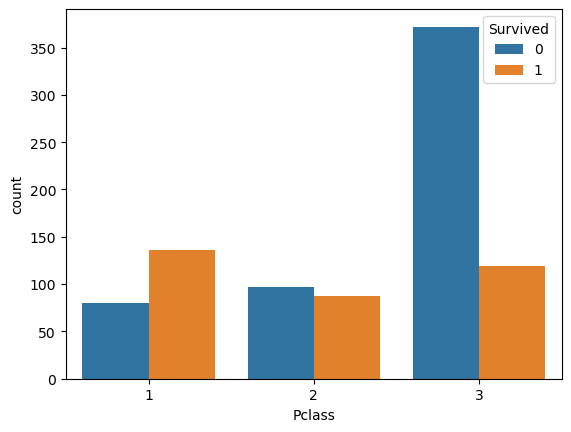


SibSp


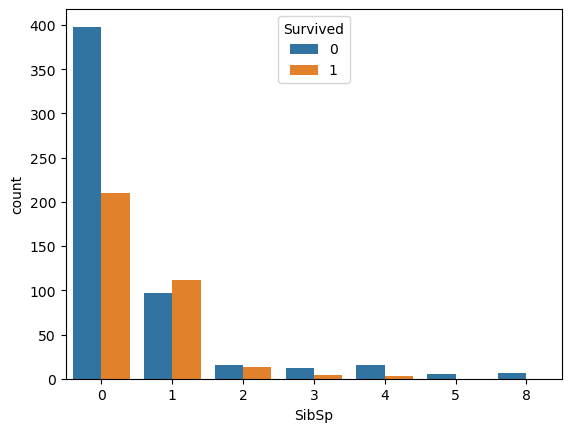


Parch


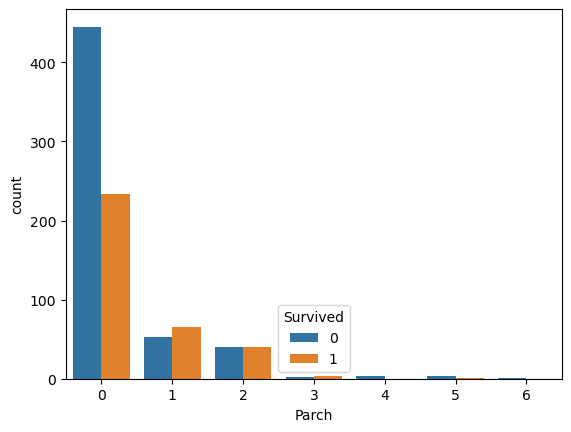

In [14]:

for column_name in ['Sex','Embarked','Pclass', 'SibSp', 'Parch']:
    print(column_name)
    sns.countplot(data=train_df, x=column_name, hue='Survived')
    plt.show()
    print("")

<AxesSubplot:xlabel='Age', ylabel='Count'>

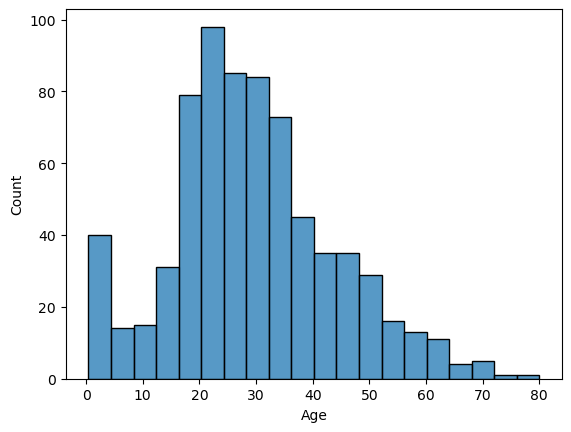

In [15]:
sns.histplot(train_df['Age'])

La fonction 'histplot' de Seaborn est utilisée pour dessiner l'histogramme. Cette fonction affiche la distribution de fréquence de la colonne "Age", c'est-à-dire le nombre de passagers dans chaque groupe d'âge.

L'histogramme peut être utilisé pour identifier des modèles et des tendances dans la distribution des âges des passagers dans l'ensemble de données "train_df", tels que le groupe d'âge le plus courant ou la présence de valeurs aberrantes.

In [16]:
# calculate the mean age of male passengers in the 'train_df' dataset.
mean_male = train_df[train_df['Sex']=='male']['Age'].mean()
mean_male

30.72664459161148

In [17]:
# calculate the mean age of بثmale passengers in the 'train_df' dataset.
mean_female = train_df[train_df['Sex']=='female']['Age'].mean()
mean_female

27.915708812260537

Comme nous l'avons vu, il existe une différence entre la moyenne de mal et la moyenne de fmale

dans le code ci-dessous 
la fonction "fillna" est utilisée pour compléter les valeurs manquantes dans la colonne "âge" des passagers masculins et féminins avec la valeur "mean_male" et "mean_female" respectivement.

Pour ce faire, les lignes de l'ensemble de données "train_df" dont le sexe est "masculin" sont d'abord sélectionnées à l'aide de la condition "train_df['Sex']=='male'". Ensuite, pour ces lignes sélectionnées, les valeurs manquantes dans la colonne "Age" sont remplies avec "mean_male".

In [18]:
train_df.loc[train_df['Sex']=='male', 'Age'] = train_df[train_df['Sex']=='male']['Age'].fillna(value=mean_male)

In [19]:
train_df.loc[train_df['Sex']=='female', 'Age'] = train_df[train_df['Sex']=='female']['Age'].fillna(value=mean_female)

In [20]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

comme nous l'avons vu, il n'y a pas de valeurs nulles dans la colonne âge

In [21]:
# Dropping some unimportant features
train_df.drop(['PassengerId','SibSp','Parch','Ticket','Cabin','Name'], axis=1, inplace= True)

In [22]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [23]:
train_df.dropna(inplace=True)

La fonction 'dropna' est utilisée pour supprimer toutes les lignes de l'ensemble de données 'train_df' qui contiennent des valeurs manquantes (c'est-à-dire des valeurs NaN). Le paramètre 'inplace=True' est utilisé pour modifier directement l'ensemble de données 'train_df', plutôt que de renvoyer un nouvel ensemble de données modifié.

In [24]:
train_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

comme nous l'avons vu ci-dessus, il n'y a pas de valeurs nulles 

In [25]:
train_df.replace({'female':0,'male':1},inplace=True)

La fonction "replace" est utilisée pour remplacer les valeurs "female" et "male" de l'ensemble de données "train_df" par 0 et 1, respectivement. Pour ce faire, un dictionnaire contenant les clés "female" et "male" et les valeurs 0 et 1 correspondantes est transmis à la fonction "replace". Le paramètre 'inplace=True' est utilisé pour modifier directement l'ensemble de données 'train_df', plutôt que de renvoyer un nouvel ensemble de données modifié.


In [26]:
train_df = pd.get_dummies(train_df,columns=['Embarked'],prefix='Embarked')

La fonction 'get_dummies' de pandas est utilisée pour créer des variables fictives pour la colonne 'Embarked' dans l'ensemble de données 'train_df'. Pour ce faire, l'ensemble de données "train_df" et la colonne "Embarked" sont transmis au paramètre "columns" de la fonction "get_dummies". Le paramètre "prefix" est utilisé pour ajouter le préfixe "Embarked_" aux noms de colonnes des variables fictives résultantes.

L'ensemble de données "train_df" qui en résulte contient désormais les nouvelles colonnes "Embarked_C", "Embarked_Q" et "Embarked_S", avec des valeurs binaires (0 ou 1) indiquant si un passager a embarqué dans le port correspondant.

In [27]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,0,0,1
1,1,1,0,38.0,71.2833,1,0,0
2,1,3,0,26.0,7.9250,0,0,1
3,1,1,0,35.0,53.1000,0,0,1
4,0,3,1,35.0,8.0500,0,0,1


### split du données d'entrainement 

In [28]:
# split data into x and y
x = train_df.drop('Survived',axis =1)
y = train_df['Survived']
x

,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.000000,7.2500,0,0,1
1,1,0,38.000000,71.2833,1,0,0
2,3,0,26.000000,7.9250,0,0,1
3,1,0,35.000000,53.1000,0,0,1
4,3,1,35.000000,8.0500,0,0,1
...,...,...,...,...,...,...,...
886,2,1,27.000000,13.0000,0,0,1
887,1,0,19.000000,30.0000,0,0,1
888,3,0,27.915709,23.4500,0,0,1
889,1,1,26.000000,30.0000,1,0,0


Ce code normalise les valeurs des colonnes "Age" et "Fare" dans le cadre de données "x" en utilisant le StandardScaler de la bibliothèque scikit-learn.

In [29]:
# Select numerical columns
num_cols = ['Age', 'Fare']

# Create scaler object
scaler = StandardScaler()

# Fit scaler on selected columns
scaler.fit(x[num_cols])

# Transform selected columns with scaler
x[num_cols] = scaler.transform(x[num_cols])

In [30]:
# split train data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# modélisation

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming x_train and y_train are your training data and x_test and y_test are your testing data.

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBClassifier': XGBClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier()
}

# Train and evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} accuracy (cross-validation): {scores.mean():.3f} +/- {scores.std():.3f}")
    
    # Fit the model to the full training set and make predictions on the test set
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Evaluate the model on the test set
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1-score: {f1:.3f}")
    print()

Logistic Regression accuracy (cross-validation): 0.788 +/- 0.044
Accuracy: 0.803
Precision: 0.733
Recall: 0.698
F1-score: 0.715

Decision Tree accuracy (cross-validation): 0.761 +/- 0.020
Accuracy: 0.815
Precision: 0.727
Recall: 0.762
F1-score: 0.744

Random Forest accuracy (cross-validation): 0.799 +/- 0.046
Accuracy: 0.860
Precision: 0.817
Recall: 0.778
F1-score: 0.797

SVM accuracy (cross-validation): 0.779 +/- 0.041
Accuracy: 0.837
Precision: 0.804
Recall: 0.714
F1-score: 0.756

XGBClassifier accuracy (cross-validation): 0.786 +/- 0.026
Accuracy: 0.843
Precision: 0.769
Recall: 0.794
F1-score: 0.781

GradientBoostingClassifier accuracy (cross-validation): 0.817 +/- 0.045
Accuracy: 0.854
Precision: 0.825
Recall: 0.746
F1-score: 0.783

AdaBoostClassifier accuracy (cross-validation): 0.778 +/- 0.046
Accuracy: 0.837
Precision: 0.774
Recall: 0.762
F1-score: 0.768



Après avoir comparé la précision de plusieurs modèles, nous avons constaté que le modèle GradientBoostingClassifier avait la plus grande précision.

Je vais donc l'utiliser pour faire une prédiction sur l'ensemble de test.

In [38]:
gbc= GradientBoostingClassifier()
scores = cross_val_score(gbc, x_train, y_train, cv=5, scoring='accuracy')
print(f"{gbc} accuracy: {scores}")
    
# Fit the model to the full training set and make predictions on the test set
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)
# Evaluate the model on the test set
acc = accuracy_score(y_test, y_pred)
print (acc)

GradientBoostingClassifier() accuracy: [0.82517483 0.85211268 0.73943662 0.8028169  0.86619718]
0.8539325842696629


# Préparation des données de test

In [39]:
# show the first 5 columns 
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
# fill the null value that in the age column
mean_male_test = test[test['Sex']=='male']['Age'].mean()
mean_female_test = test[test['Sex']=='female']['Age'].mean()
test.loc[test['Sex']=='male', 'Age'] = test[test['Sex']=='male']['Age'].fillna(value=mean_male_test)
test.loc[test['Sex']=='female', 'Age'] = test[test['Sex']=='female']['Age'].fillna(value=mean_female_test)

# fill the null values that in the Fare column
test['Fare'].fillna(test['Fare'].median(), inplace = True)

# Dropping some unimportant features
test.drop(['SibSp','Parch','Ticket','Cabin','Name'], axis=1, inplace= True)

KeyError: 'Cabin'

In [43]:
test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
dtype: int64

comme nous l'avons vu plus haut, il n'y a pas de valeurs nulles

In [44]:
# convert string values to numeric by replace the female and male by 0 and 1
test.replace({'female':0,'male':1},inplace=True)

In [45]:
# using one hot encoder to convertr str values 
test = pd.get_dummies(test,columns=['Embarked'],prefix='Embarked')

In [46]:
# Fit scaler on numeric columns
scaler.fit(test[num_cols])

# Transform numeric columns with scaler
test[num_cols] = scaler.transform(test[num_cols])

In [47]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,0.334992,-0.497413,0,1,0
1,893,3,0,1.325529,-0.512278,0,0,1
2,894,2,1,2.514174,-0.464100,0,1,0
3,895,3,1,-0.259330,-0.482475,0,0,1
4,896,3,0,-0.655545,-0.417492,0,0,1


In [48]:
#Store the PassengerId column in a separate variable

PassengerId = test['PassengerId']

# drop PassengerId column from the test set
test.drop('PassengerId',axis=1,inplace=True)

# Prédictions et soumissions

In [49]:
# #Generate predictions for the test data using GradientBoostingClassifier 
test_pred = gbc.predict(test)


Créer un fichier de soumission avec la colonne PassengerId et les résultats de survie prédits.


In [50]:
submission = pd.DataFrame({'PassengerId': PassengerId, 'Survived': test_pred})

In [53]:
submission.to_csv('submission.csv', index=False)